## **Homework 5**

#### **Problem 1**

In [2]:
#Setup
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (20,15)

In [25]:
#Creating Simulated Background

background_events = stats.norm.rvs(loc = 0, size = 1000000, scale = 3)
signal = stats.uniform.rvs(loc = 0, scale = 20, size = 1000000)

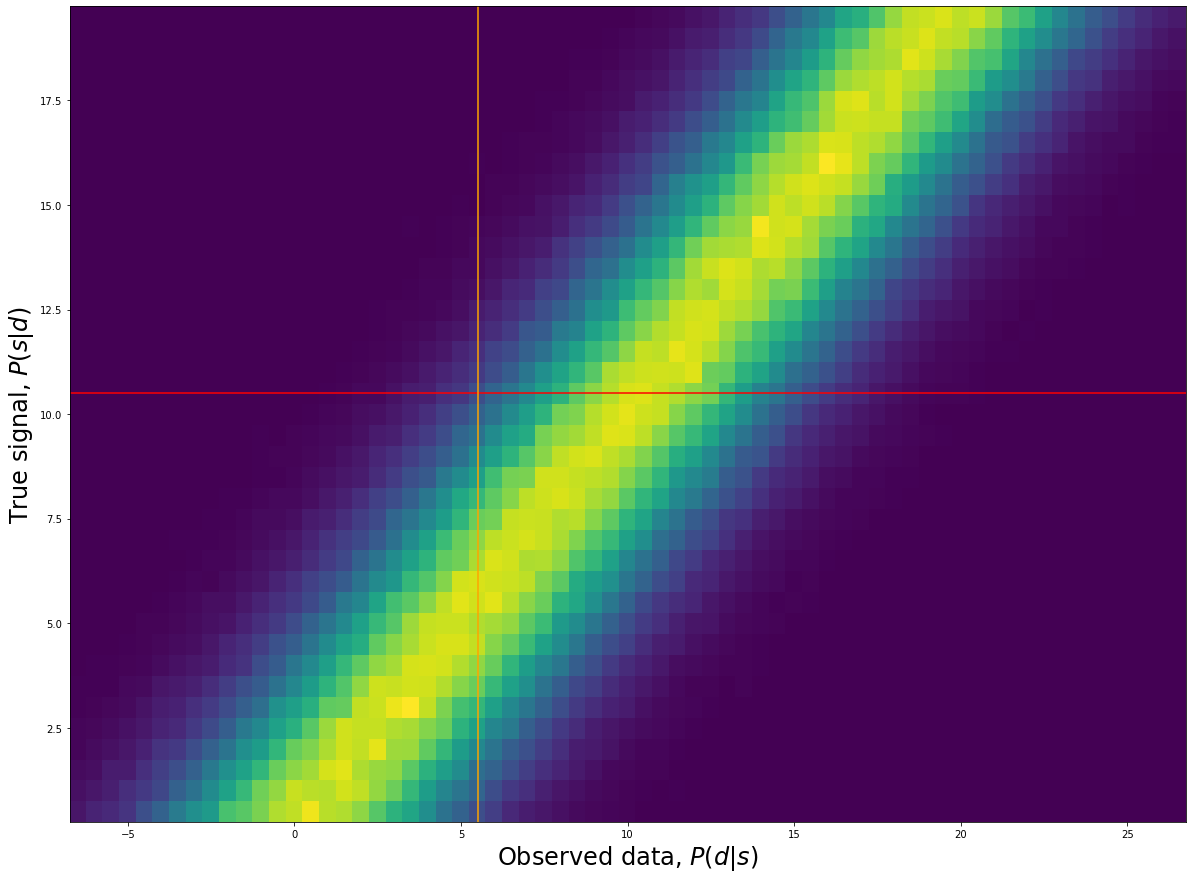

In [69]:
data = background_events + signal

signaledges = np.linspace(0,20,41)
dataedges = np.linspace(-7,27,69)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
true = signaledges[21]
observed = dataedges[25]
plt.axhline(true,color = 'red')
plt.axvline(observed,color = 'orange')
plt.show()

#### **b)** True Injected signal shown by the red line, what is P(d|s)?


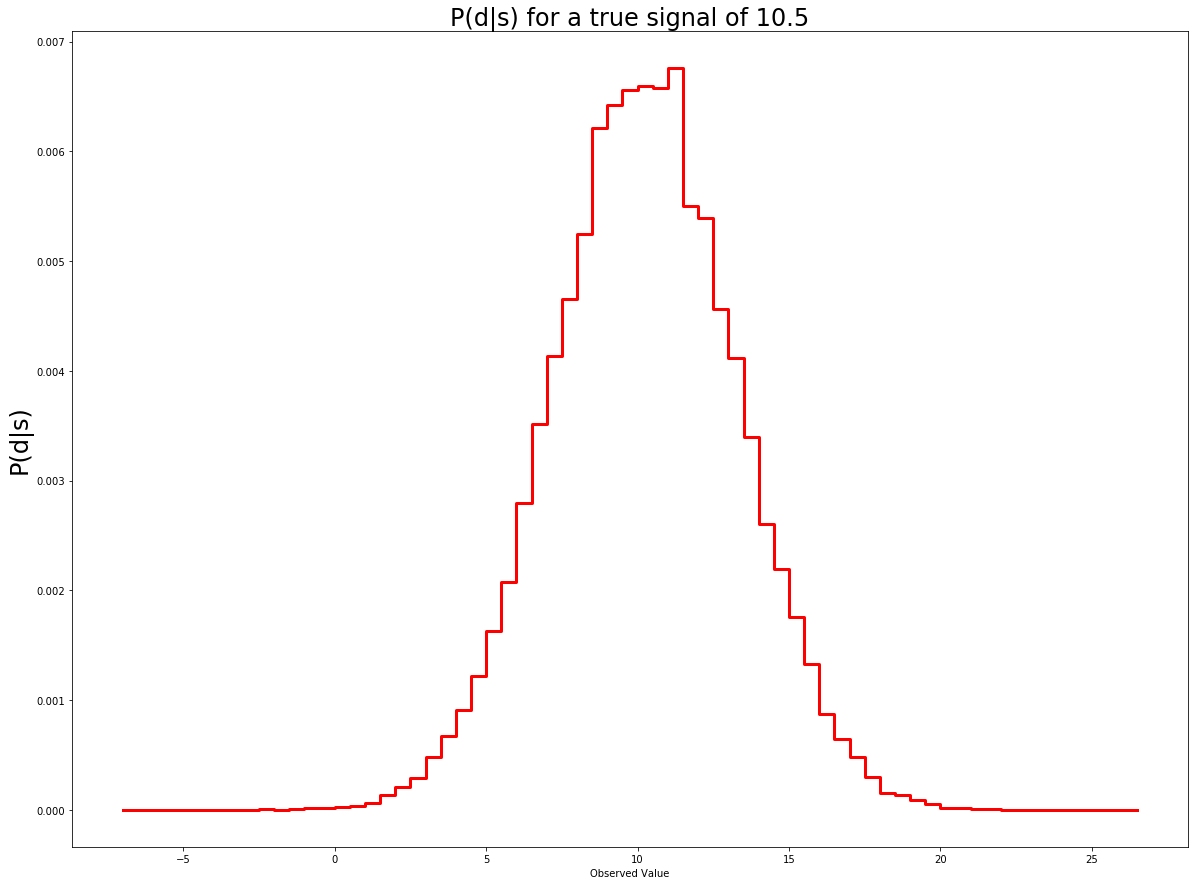

In [70]:
plt.step(temp[:-1],Psd[:,21],Linewidth = 3, color = 'red')
plt.title('P(d|s) for a true signal of ' + str(true),fontsize = 24)
plt.xlabel('Observed Value',fontsize = 24)
plt.ylabel('P(d|s)',fontsize = 24)
plt.show()

#### **c)** Observed Data Value as shown by the orange line, what is P(s|d)?

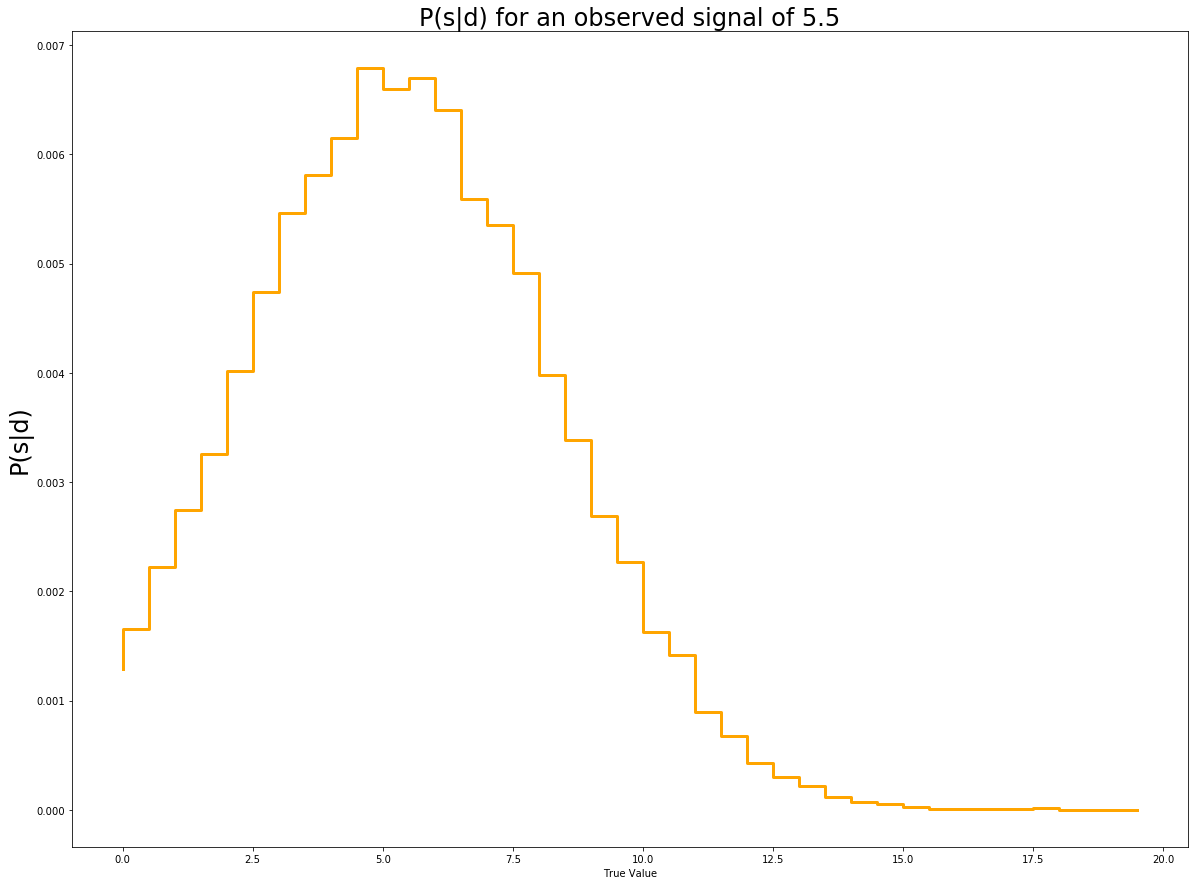

In [71]:
plt.step(temp2[:-1],Psd[25,:],Linewidth = 3, color = 'orange')
plt.title('P(s|d) for an observed signal of ' + str(np.round(observed,3)) ,fontsize = 24)
plt.xlabel('True Value',fontsize = 24)
plt.ylabel('P(s|d)',fontsize = 24)
plt.show()

#### **Problem 2** Now repeat the above, but with a background with non-zero mean.

In [72]:
background_events2 = stats.norm.rvs(loc = 9, size = 1000000, scale = 3)
signal2 = stats.uniform.rvs(loc = 0, scale = 20, size = 1000000)

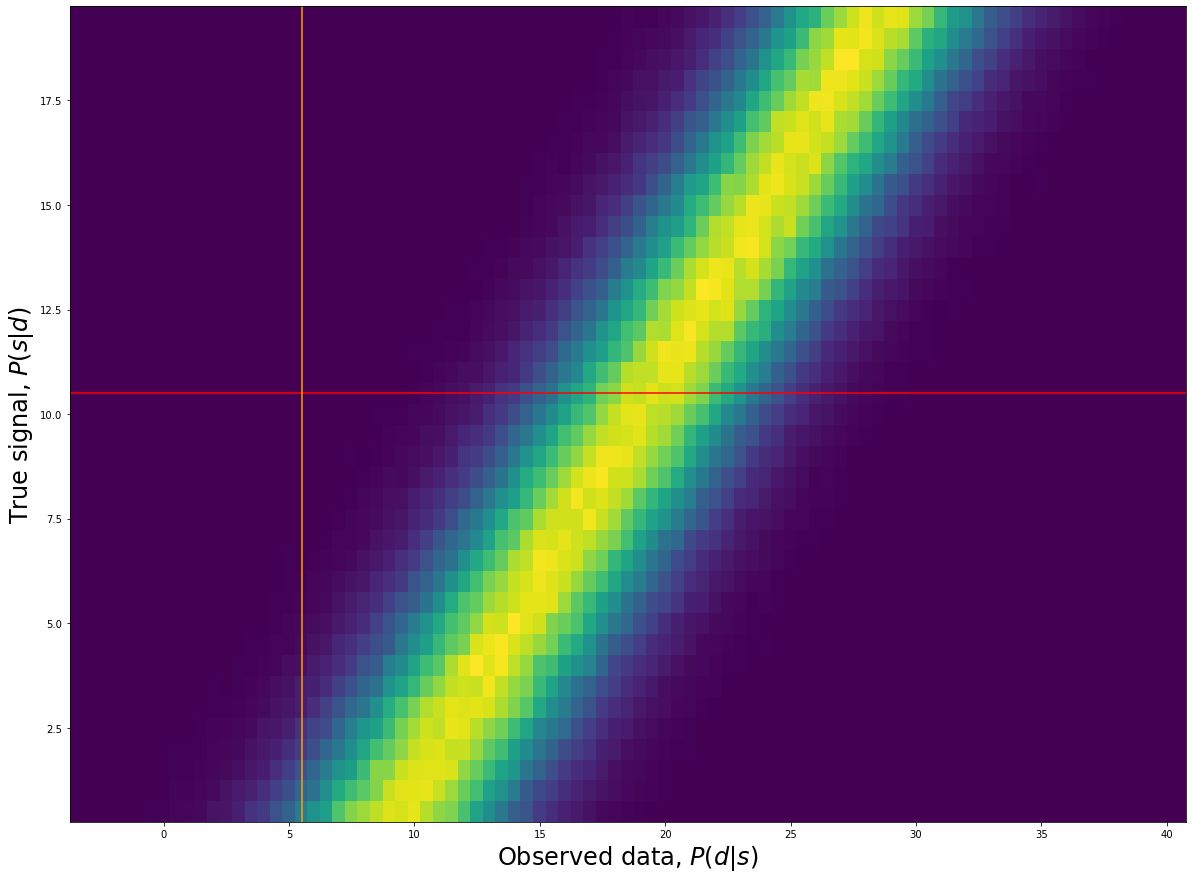

In [80]:
data2 = background_events2 + signal2

signaledges2 = np.linspace(0,20,41)
dataedges2 = np.linspace(-4,41,91)

Psd, temp, temp2= np.histogram2d(data2,signal2, bins=[dataedges2,signaledges2], density=True)

datacenters2 = (dataedges2[:-1] + dataedges2[1:]) / 2
signalcenters2 = (signaledges2[:-1] + signaledges2[1:]) / 2
plt.pcolormesh(datacenters2,signalcenters2,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
true = signaledges2[21]
observed = dataedges2[19]
plt.axhline(true,color = 'red')
plt.axvline(observed,color = 'orange')
plt.show()

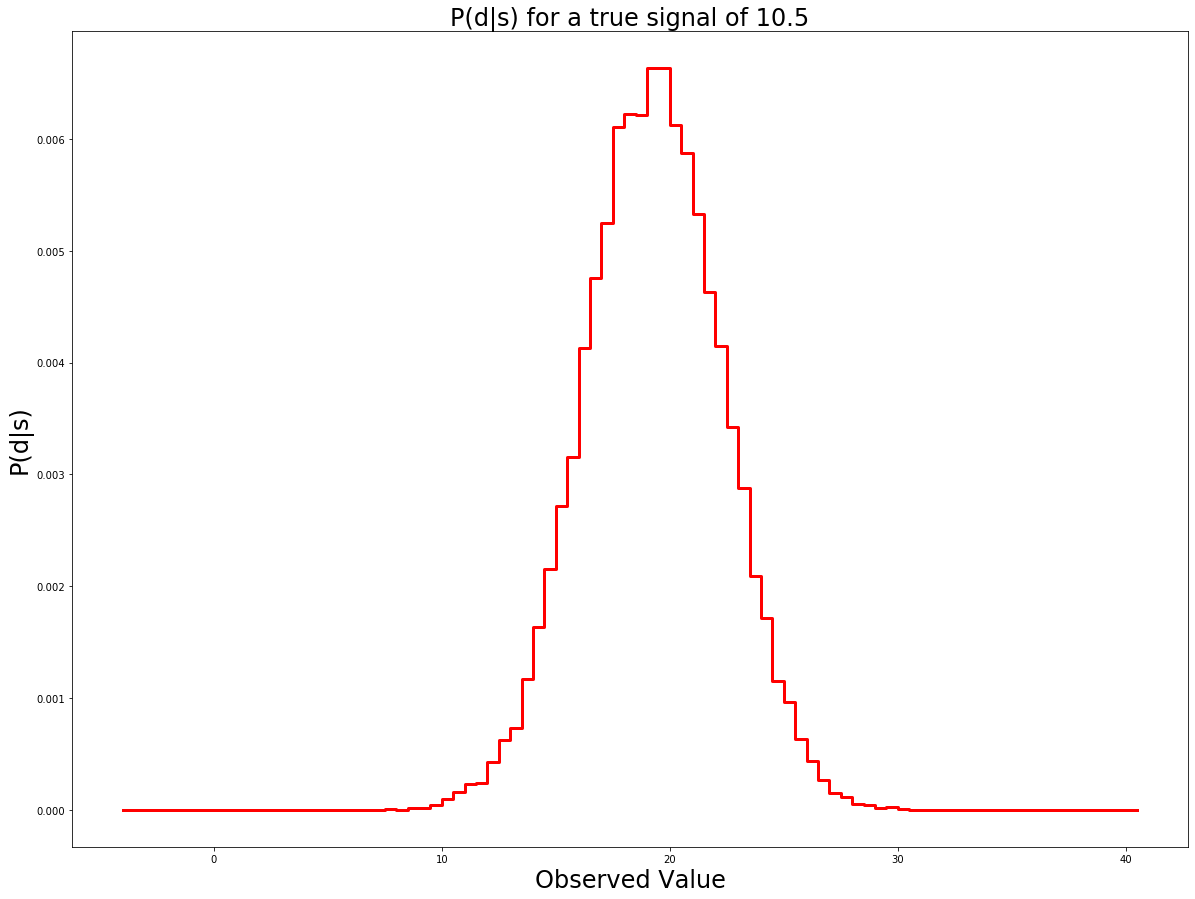

In [81]:
plt.step(temp[:-1],Psd[:,21],Linewidth = 3, color = 'red')
plt.title('P(d|s) for a true signal of '+str(true),fontsize = 24)
plt.xlabel('Observed Value',fontsize = 24)
plt.ylabel('P(d|s)',fontsize = 24)
plt.show()

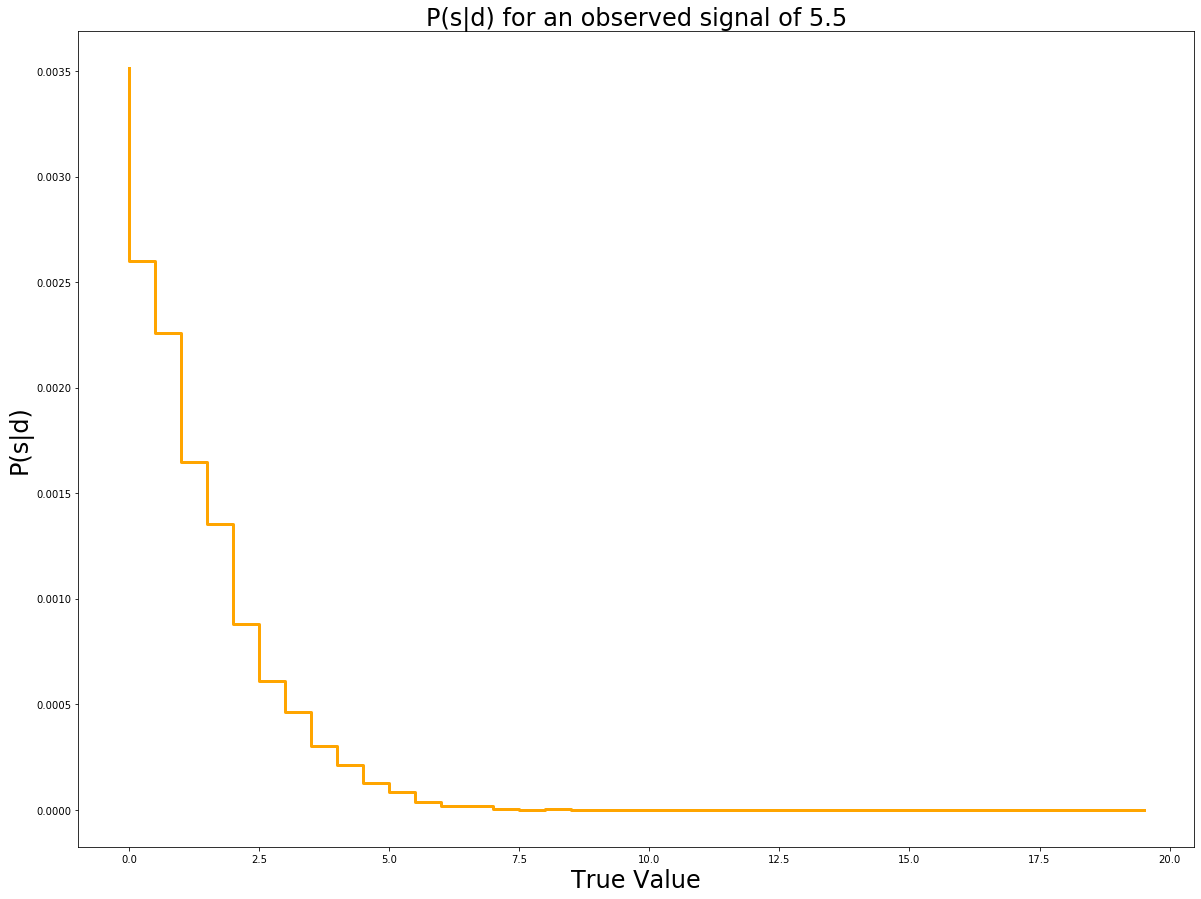

In [82]:
plt.step(temp2[:-1],Psd[19,:],Linewidth = 3, color = 'orange')
plt.title('P(s|d) for an observed signal of ' + str(np.round(observed,3)) ,fontsize = 24)
plt.xlabel('True Value',fontsize = 24)
plt.ylabel('P(s|d)',fontsize = 24)
plt.show()